In [2]:
#importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
df1 = pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
df1.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
df1.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
print(df1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


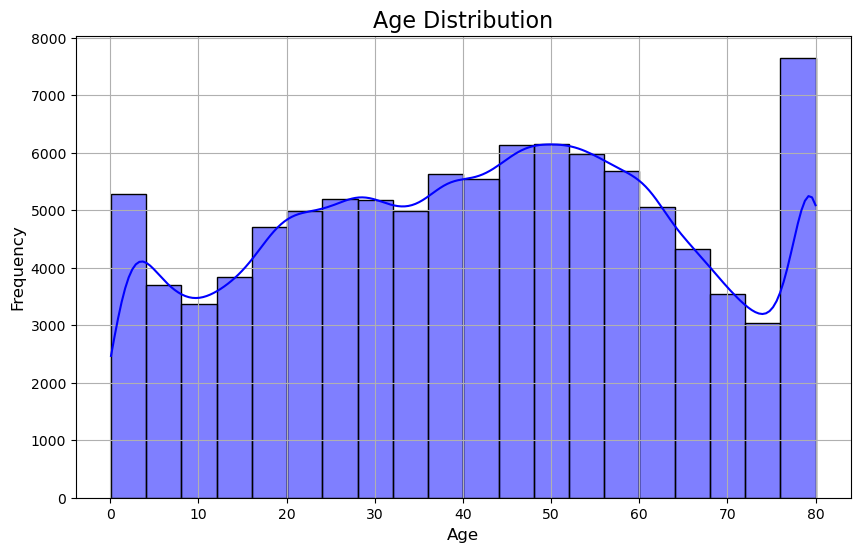

In [8]:
# Plotting Age Distribution
plt.figure(figsize=(10, 6))

# Histogram of Age Distribution
sns.histplot(df1['age'], kde=True, color='blue', bins=20)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


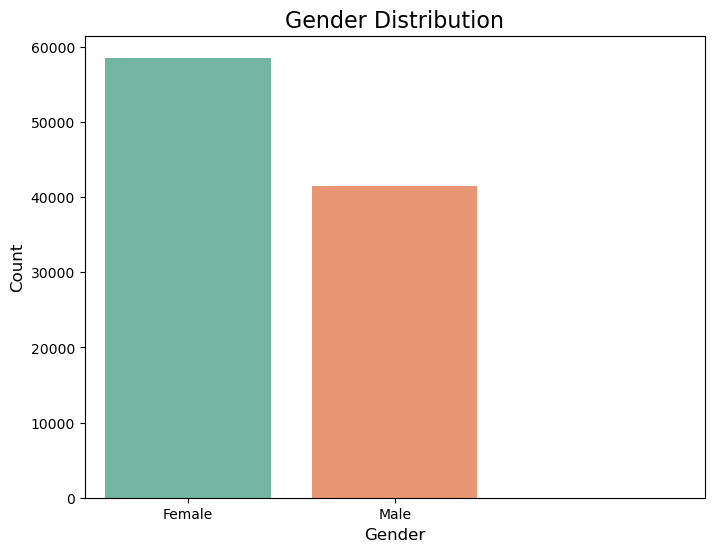

In [9]:
plt.figure(figsize=(8, 6))

# Countplot for Gender Distribution (0 for Female, 1 for Male)
sns.countplot(x=df1['gender'],palette='Set2')


plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0,1], ['Female','Male']) 
plt.show()

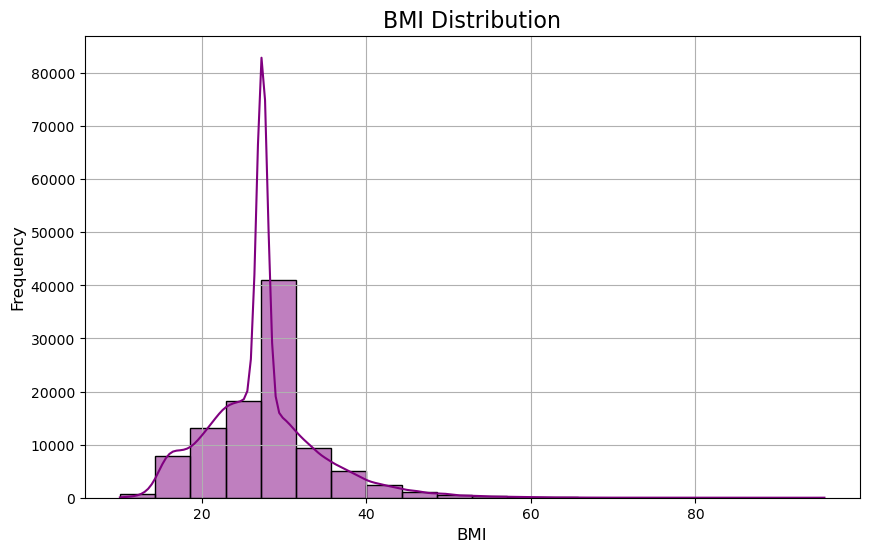

In [10]:
# Plotting BMI Distribution
plt.figure(figsize=(10, 6))

# Histogram with KDE for BMI Distribution
sns.histplot(df1['bmi'], kde=True, color='purple', bins=20)
plt.title('BMI Distribution', fontsize=16)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


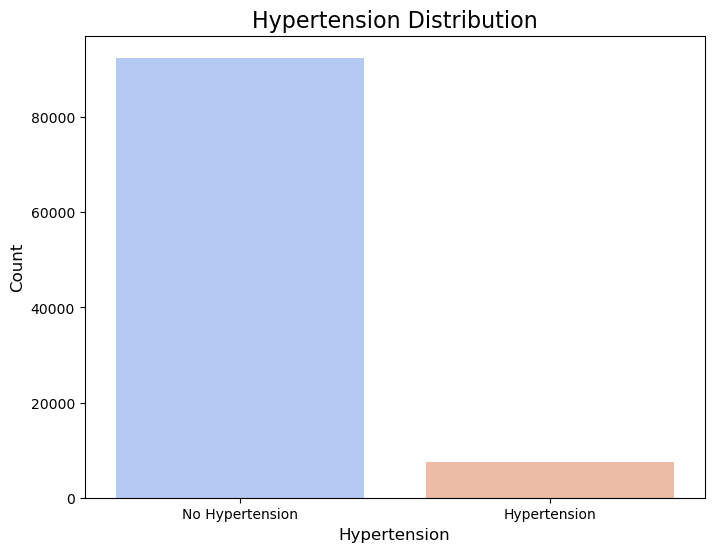

In [11]:
# Plotting Hypertension Distribution
plt.figure(figsize=(8, 6))

# Countplot for Hypertension Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['hypertension'], palette='coolwarm')


plt.title('Hypertension Distribution', fontsize=16)
plt.xlabel('Hypertension', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'])  # Set x-axis labels
plt.show()


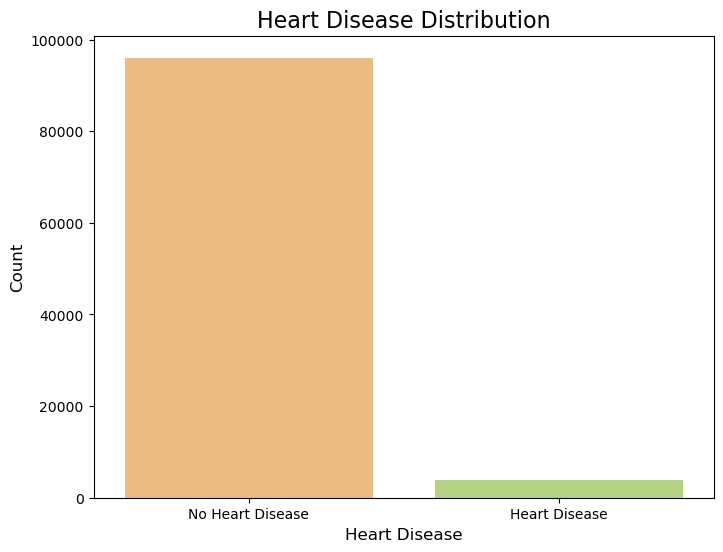

In [12]:
# Plotting Heart Disease Distribution
plt.figure(figsize=(8, 6))

# Countplot for Heart Disease Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['heart_disease'], palette='RdYlGn')


plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])  # Set x-axis labels
plt.show()


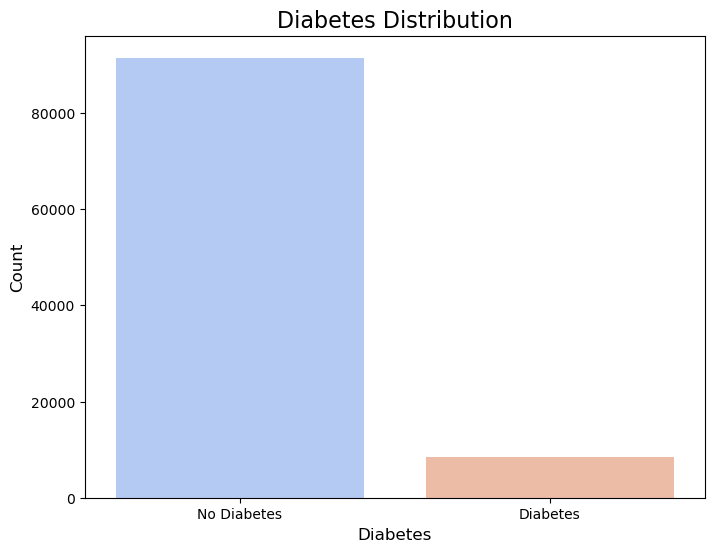

In [13]:
# Plotting Diabetes Distribution
plt.figure(figsize=(8, 6))

# Countplot for Diabetes Distribution (assuming 0 = No, 1 = Yes)
sns.countplot(x=df1['diabetes'], palette='coolwarm')


plt.title('Diabetes Distribution', fontsize=16)
plt.xlabel('Diabetes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  # Set x-axis labels
plt.show()


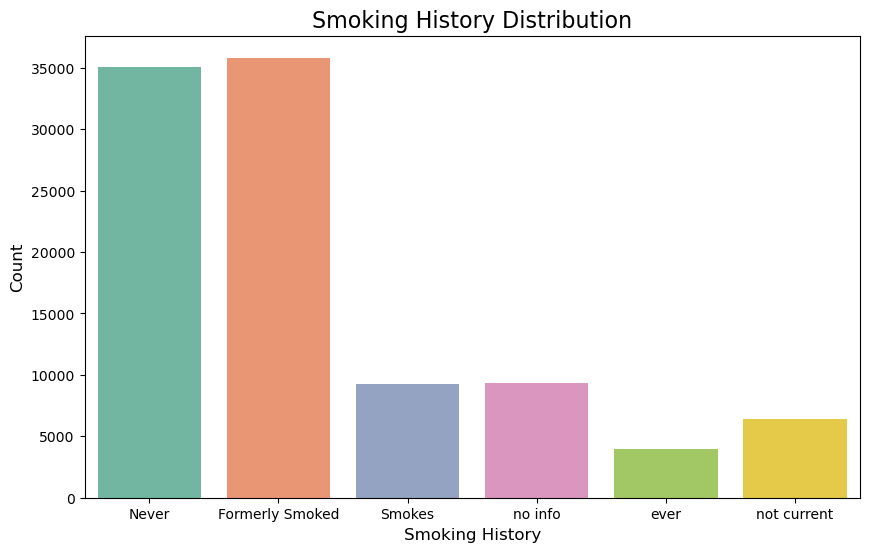

In [14]:
# Plotting Smoking History Distribution
plt.figure(figsize=(10, 6))

# Countplot for Smoking History Distribution
sns.countplot(x=df1['smoking_history'], palette='Set2')


plt.title('Smoking History Distribution', fontsize=16)
plt.xlabel('Smoking History', fontsize=12)
plt.ylabel('Count', fontsize=12)


plt.xticks([0, 1, 2,3,4,5], ['Never', 'Formerly Smoked', 'Smokes','no info','ever','not current']) 

plt.show()


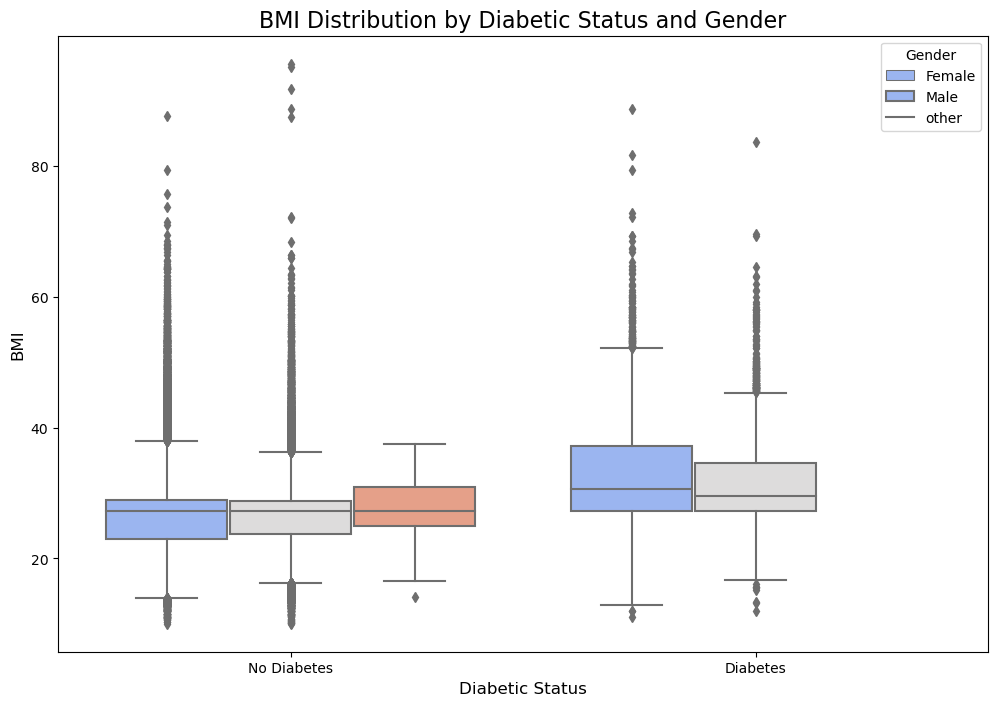

In [18]:
# Plotting BMI distribution by Diabetic Status and Gender using a Boxplot
plt.figure(figsize=(12, 8))

# Boxplot for BMI by Diabetes and Gender
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df1, palette='coolwarm')


plt.title('BMI Distribution by Diabetic Status and Gender', fontsize=16)
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])  
plt.legend(title='Gender', labels=['Female', 'Male','other'])

plt.show()


In [23]:
# Feature selection and scaling
X = df1.drop('diabetes', axis=1)  # Features
y = df1['diabetes'] 


le = LabelEncoder()
df1['smoking_history'] = le.fit_transform(df1['smoking_history'])  
df1['gender'] = le.fit_transform(df1['gender'])  

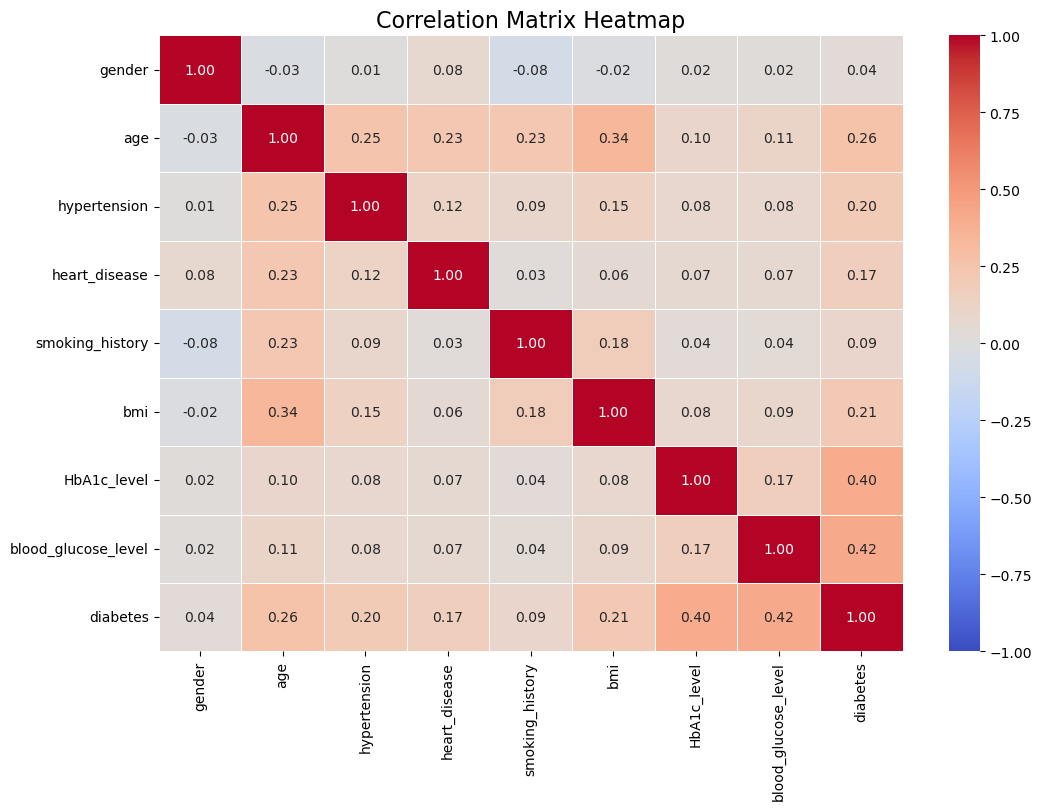

In [24]:


correlation_matrix = df1.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)


plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


In [25]:
#  Separate features and target
X = df1.drop('diabetes', axis=1)  
y = df1['diabetes']

# Apply StandardScaler to numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}


In [28]:
# Model training and evaluation
results = {}

for model_name, model in models.items():
    # Cross-validation for better model evaluation
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # Train the model on the entire training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Save results
    results[model_name] = {
        'Cross-Validation Mean Accuracy': cv_results.mean(),
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    }

    print(f"Model: {model_name}")
    print(f"Cross-Validation Mean Accuracy: {cv_results.mean():.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("-" * 50)

Model: Random Forest
Cross-Validation Mean Accuracy: 0.9703
Test Accuracy: 0.9704
Precision: 0.9507
Recall: 0.6891
F1-Score: 0.7990
AUC: 0.8429
--------------------------------------------------
Model: Decision Tree
Cross-Validation Mean Accuracy: 0.9512
Test Accuracy: 0.9522
Precision: 0.7122
Recall: 0.7389
F1-Score: 0.7253
AUC: 0.8555
--------------------------------------------------
Model: Logistic Regression
Cross-Validation Mean Accuracy: 0.9607
Test Accuracy: 0.9587
Precision: 0.8639
Recall: 0.6130
F1-Score: 0.7171
AUC: 0.8020
--------------------------------------------------
